# An Introduction to the Pandas DataFrame Structure

Pandas is quite likely the most important python module available to engineers; it is essentially a data processing and analysis package that provides an architecture designed to handle small (1 sample) or large ( > 1 million rows) datasets with ease.  Let's dive in!     

## The Pandas DataFrame 

At the very heart of pandas is a thing called a dataframe - a pandas.DataFrame() to be exact.  The dataframe is an object that serves as the storehouse for all your data; it is essentially a massive table in which you have columns that represent data fields and rows that represent a certain observance of these data fields.  For instance, we may have dataframe that stores the results from a laboratory experiment in which a pressure transducer measures the internal pressure of an air-filled vessel and a thermocouple measures the internal temperature. Imagine that we are interested in verifying ideal gas law by pressurizing vessel and measuring both the temperature and pressure once every second; we run the experiment for ten minutes and log these data (perhaps using an Arduino based transducer interfaced to a python based logger) and obtian a .csv file that contains "InternalTemp", "InternalPres", and "TimeStamp" as the three datafields where "TimeStamp" is the date and time at which the measurment was performed.  In this case, we would import these data into a pandas dataframe (using the pandas.import_csv( ) function ) and obtain an organized table with three columns and 600 rows ($\big(
1\frac{sample}{sec}\big)\big(\frac{60 sec}{min}\big)\big(10 min\big)$).  This leads to the next fundamental aspect of dataframes

In our hypothetical dataframe, we have three datafields where two supply the physcial measurments we seek and the other gives information about when these measurements were recorded; furthermore, the timestamp provides a way to link the temeprature and pressure to one another at certain reference points (the the time at which they were taken).  Hence, the "TimeStamp" columns would provide an excellent way to $\textit{index}$ our dataframe.

Since I don't have any actual temperature and pressure data to play with, let's just create a dataframe using some common mathematical functions to generate the columns
 


### Pandas Intro - Demo 1.1

Begin (as most python scripts do) by importing the modules you will be using.

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Next, we get to the actual coding by doing the following 
1. Create the input column, $x$, using the *linspace* function from the numpy package.  This function (identical to linspace MatLab users will be familiar with) just generates an array of equally spaced values between two specified numbers; the syntax is *np.linspace(Start,Stop,NumberOfPoints)*
2. Create a *dictionary* which contains three keys, *Function1*, *Function2*, and *Input*.  Each key is basically just a label for each corresponding variable contained within the dictionary, so rather than just creating an *array* of three different variables, we create a *dictionary* of three different variables where each variable is accessed using its key rather than a positional index.  In this case, each variable is an array; the *Input* variable is just the $x$ values we already made.  Let's make *Function1* be a decaying $cosine$ function, and let's have *Function2* be a decaying $sine$ function
3. Finally, we convert the variable $Data$ (which is a dictionary object) into a pandas *DataFrame* object called $DF$.

In [45]:
x=np.linspace(0,6*np.pi,1000)
Data={'Function1':np.cos(x)*1/(1+x),'Function2':np.sin(x)*1/(1+x),'Input':x}
DF=pd.DataFrame(Data)

We can take a look at our DataFrame by typing in $DF$

In [46]:
DF

,Function1,Function2,Input
0,1.000000,0.000000e+00,0.000000
1,0.981306,1.851790e-02,0.018868
2,0.962949,3.635593e-02,0.037737
3,0.944911,5.354417e-02,0.056605
4,0.927176,7.011056e-02,0.075474
...,...,...,...
995,0.050427,-3.813176e-03,18.774082
996,0.050442,-2.858343e-03,18.792951
997,0.050439,-1.904312e-03,18.811819
998,0.050418,-9.514196e-04,18.830687


Everything seems to be in order.  Note that we have three labeled columns and 1000 rows (it says 999 as the last index, but don't forget that it starts at 0).

There are two ways we can access a specfic column of a *DataFrame*; we can either use brackets to specificy the column name as a string or we can use  a period to specify the column name as an attribute of the *DataFrame* object. For instance, either line below will return the same result.

In [47]:
DF['Function1']
DF.Function1

0      1.000000
1      0.981306
2      0.962949
3      0.944911
4      0.927176
         ...   
995    0.050427
996    0.050442
997    0.050439
998    0.050418
999    0.050379
Name: Function1, Length: 1000, dtype: float64

We can utilize the *Matplotlib* package to create some nice plots of our data.  See the **PythonPlottingDemo** notebook for a plotting tutorial. Let's begin by generating some line plots of the data.

Text(0.5, 0.98, 'Example of Plotting in Matplotlib')

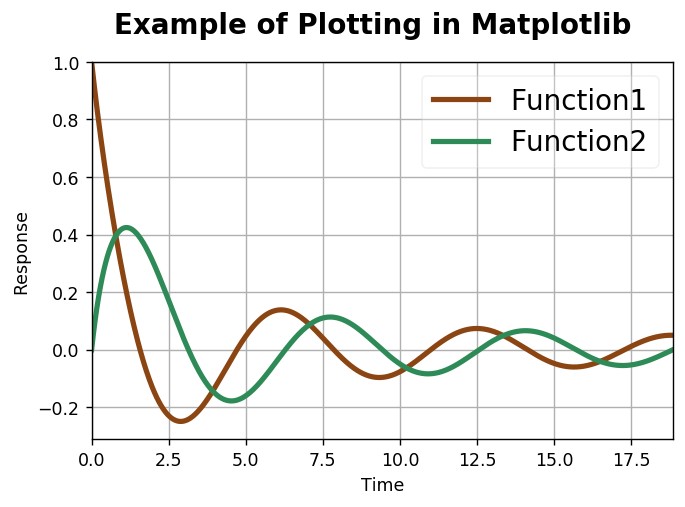

In [48]:
'''Create figure and axes objects'''
fig=plt.figure(dpi=125)
ax=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.plot(DF.Input,DF.Function1,color='saddlebrown',linewidth=3,label='Function1')
plt.plot(DF.Input,DF.Function2,color='seagreen',linewidth=3,label='Function2')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax.legend(loc='upper right',fontsize=16,facecolor='white',framealpha=0.25)
ax.set_xlim(right = DF.Input.iloc[-1] , left = DF.Input.iloc[0])
ax.set_ylim(top=1)
ax.set_ylabel('Response')
ax.set_xlabel('Time')

'''Create a title for the figure'''
fig.suptitle('Example of Plotting in Matplotlib', fontsize=16, weight='bold')

Next, lets generate a cool plot using the *fill_between()* function from *matplotlib*.

Text(0.5, 0.98, 'Example of Plotting in Matplotlib with fill_between()')

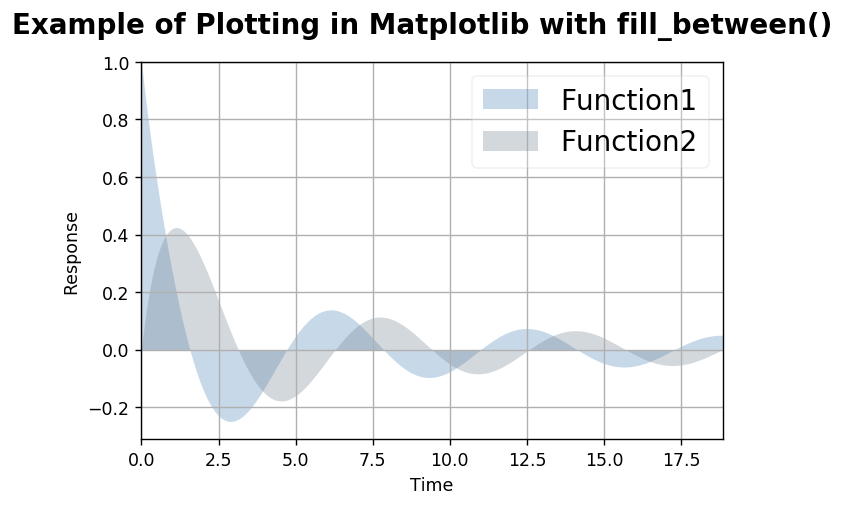

In [49]:
'''Create a new set of figure and axes objects'''
fig2=plt.figure(dpi=125)
ax2=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.fill_between(DF.Input,DF.Function1,color='steelblue',alpha=0.3,linewidth=0,label='Function1')
plt.fill_between(DF.Input,DF.Function2,color='slategrey',alpha=0.3,linewidth=0,label='Function2')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax2.legend(loc='upper right',fontsize=16,facecolor='white',framealpha=0.25)
ax2.set_xlim(right = DF.Input.iloc[-1] , left = DF.Input.iloc[0])
ax2.set_ylim(top=1)
ax2.set_ylabel('Response')
ax2.set_xlabel('Time')

'''Create a title for the figure'''
fig2.suptitle('Example of Plotting in Matplotlib with fill_between()', fontsize=16,weight='bold')

### Pandas Intro 1.2
Next, lets play with some actual data from a project I did for my ME 553 Feeback Control Systems class.  For this project, I was using an Arduino to control the temperature of a heating element; the goal was to bring the temperature up to a certain target (50$^{\circ}$ in this case) and then hold the element at this temperature.  For this project, I wrote a python script that logs the serial output from the Arduino into a .csv file; the Arduino measured and output the following parameters to the serial output:
1. Time at which the sample was taken
2. Ambient Temperature
3. Heating Element Temperature
4. Duty Cycle of the Heating Element

We can open this data from the .csv file using the Pandas function *read_csv()*.

In [50]:
'''Store the name of the csv file - note that it has to be in our current directory if we just supply
the name, otherwise we have to supply the entire path to the file; however, there are some super nice
python modules that make this task pretty easy.'''

FileName='TempData.csv'

'''Create the DataFrame'''
DF2=pd.read_csv(FileName)


If we wish to verify that the data loaded in properly, a handy function to use is the *head()* function  wich is a method of a *DataFrame* object. The *head* function just returns the first five rows of the DataFrame we access it through.

In [51]:
DF2.head()

,Time,Ambient,Heater,Duty Cycle
0,2019-04-25 18:34:20,NaN,NaN,NaN
1,2019-04-25 18:34:21,19.00,NaN,NaN
2,2019-04-25 18:34:21,20.37,19.0,NaN
3,2019-04-25 18:34:21,20.37,19.0,100.0
4,2019-04-25 18:34:22,20.37,19.0,72.9


See how that works?  We have our *DataFrame* object named DF2 and we call the *head()* function through this dataframe using the '.' followed by the function name.  This is how functions specific to *DataFrame* objects can be called - *head()* is just one of many, many functions that can be called through a *DataFrame* object. For instance, we could type *DF2.tail()* to get the last five rows of the dataframe or we could type *DF2.max()* to get the maximum value of each column.

In [52]:
DF2.tail()

,Time,Ambient,Heater,Duty Cycle
1309,2019-04-25 18:42:26,20.44,50.00,15.6
1310,2019-04-25 18:42:26,20.44,50.25,NaN
1311,2019-04-25 18:42:26,20.44,50.25,9.2
1312,2019-04-25 18:42:27,20.44,50.25,1.3
1313,2019-04-25 18:42:27,20.37,50.00,2.9


In [53]:
DF2.max()

Time          2019-04-25 18:42:27
Ambient                     21.37
Heater                         51
Duty Cycle                    100
dtype: object

Or, another really useful function is *describe()*. This one gives us a summary of the dataset by returning several statistics about each column.

In [54]:
DF2.describe()

,Ambient,Heater,Duty Cycle
count,1313.000000,1312.000000,1019.000000
mean,20.467540,48.204078,11.313445
std,0.119488,6.627716,17.084617
min,19.000000,19.000000,0.100000
25%,20.440000,49.750000,3.600000
50%,20.500000,50.000000,5.200000
75%,20.500000,50.250000,10.200000
max,21.370000,51.000000,100.000000


Note that the *count* value (which gives the number of rows in the column) for Ambient is 1319 while the *count* for both Heater and Duty Cycle is 1318.  This is because the Heater and Duty Cycle columns contain some *NAN* values which are not counted... fortunately, pandas has a really slick function for solving this problem. Let's type in *DF2.dropna(how='any').head()* and see what happens.

In [55]:
DF2.dropna(how='any').head()

,Time,Ambient,Heater,Duty Cycle
3,2019-04-25 18:34:21,20.37,19.0,100.0
4,2019-04-25 18:34:22,20.37,19.0,72.9
5,2019-04-25 18:34:22,20.37,19.0,72.9
6,2019-04-25 18:34:22,20.44,19.0,72.9
7,2019-04-25 18:34:23,20.37,19.0,72.9


Nice! the *NAN* values are gone now.  The *dropna()* function allows us to drop rows that contain *NAN* values from the dataframe, and the cool thing is we can specify how we want to deal with *NAN*. For our case, we wanted to eliminate rows that contain any *NAN*, so we passed the argument *how ='all'* to *dropna()*. If we only wanted to drop rows where all the values in that row are *NAN*, then we could have just specified *how='all'*.

Another item to note is that we called two functions in sequence on *DF2*; we first called *dropna* and then called *head*. This can be useful, but note that these these functions are called sequentially meaning that the first function is executed on the calling dataframe and then the second function is executed on the dataframe that is returned by the first function.

Finally, we come to a very important part of pandas... we just ran the *dropna()* function on the *DF2* dataframe, but what happens to *DF2*? is it changed at all?

*DF2* was created and stored in memory when we first created it using the *read_csv()* function.  When we called the *head*, *tail*, *describe*, and *dropna* functions on *DF2*, those functions, in no way, impact *DF2*; they just return a new *DataFrame* object that is not stored in memory.  If we want to change *DF2*, then we can just set *DF2* equal to this new dataframe.

In [56]:
DF2=DF2.dropna(how='any')
DF2.describe()

,Ambient,Heater,Duty Cycle
count,1019.000000,1019.000000,1019.000000
mean,20.470972,47.692836,11.313445
std,0.109524,7.378318,17.084617
min,19.690000,19.000000,0.100000
25%,20.440000,49.750000,3.600000
50%,20.440000,50.000000,5.200000
75%,20.500000,50.000000,10.200000
max,21.370000,51.000000,100.000000


If we now call *describe* on *DF2*, we see that we have made the desired changes to *DF2*; however, it should be noted that the Time column is missing, that is, *describe* returns no summaries on the Time column.  This is because Time is a non-numeric type, specifically, Time contains data of type *string*, and obiously, statistical summaries do not pertain to *strings*.  This leads to one of the most important concepts in pandas and in programming in general - Data Types.  Every column in a *DataFrame* has a specific *type* associated with it.  When we import from a .csv file, Pandas automatically converts any numeric data straight to an appropriate *type* (typically, *float64*); however, non-numeric data are left as *string*. For our case, we want Time to be of type *datetime*; we can accomplish this by using the *to_datetime()* function from Pandas.

In [57]:
DF2['Time'] = pd.to_datetime(DF2.Time)

DF2['TimeElapsed'] = (DF2.Time-DF2.Time.iloc[0]).dt.total_seconds()

It is usually a good idea to index your data using a meaningful column...

In [58]:
DF2.set_index('Time',inplace=True)

Text(0.5, 0.98, 'Plot of Demo Temperature Data')

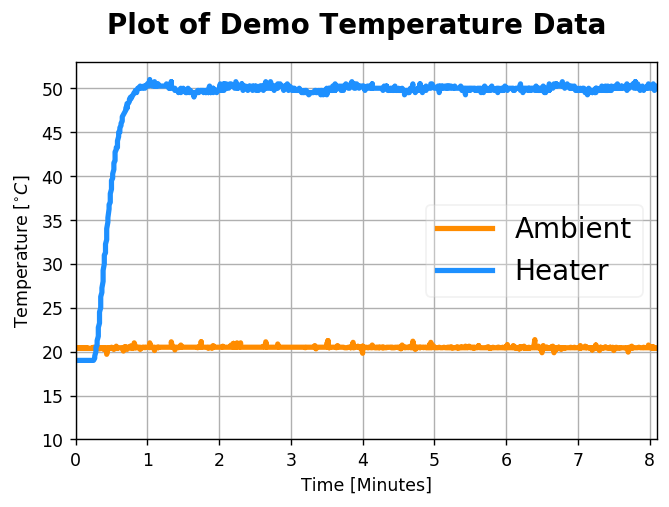

In [59]:
'''Create figure and axes objects'''
fig3=plt.figure(dpi=125)
ax3=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.plot(DF2.TimeElapsed/60,DF2.Ambient,color='darkorange',linewidth=3,label='Ambient')
plt.plot(DF2.TimeElapsed/60,DF2.Heater,color='dodgerblue',linewidth=3,label='Heater')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax3.legend(loc='center right',fontsize=16,facecolor='white',framealpha=0.25)
ax3.set_xlim(right = DF2.TimeElapsed.iloc[-1]/60 , left = DF2.TimeElapsed.iloc[0]/60)
ax3.set_ylim(bottom=10,top=DF2.Heater.max()+2)
ax3.set_ylabel('Temperature [$^{\circ}C$]')
ax3.set_xlabel('Time [Minutes]')

'''Create a title for the figure'''
fig3.suptitle('Plot of Demo Temperature Data', fontsize=16, weight='bold')

In [60]:
DF3=pd.read_csv('DistanceData.csv')

In [61]:
DF3.drop('Finish',axis=1,inplace=True)
DF3.rename(columns={'Start':'Date','Distance (mi)':'Distance'},inplace=True)
DF3.Date= pd.to_datetime(DF3.Date)
DF3.set_index('Date',inplace=True)
DF3['Month'] = DF3.index.month


In [62]:
DF3.describe()

,Distance,Month
count,346.000000,346.000000
mean,5.641015,6.407514
std,1.822416,3.506326
min,0.831800,1.000000
25%,4.511888,3.000000
50%,5.370824,6.000000
75%,6.284308,10.000000
max,16.316109,12.000000


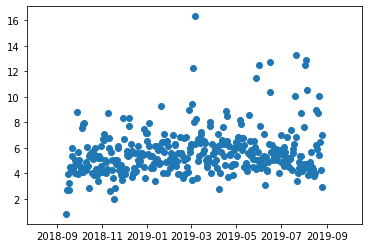

In [63]:
plt.scatter(DF3.index,DF3.Distance)

(array([ 1.,  1.,  8., 19., 76., 81., 71., 39., 17., 12.,  8.,  3.,  2.,
         1.,  1.,  4.,  1.,  0.,  0.,  1.]),
 array([ 0.83180006,  1.60601551,  2.38023096,  3.1544464 ,  3.92866185,
         4.7028773 ,  5.47709275,  6.2513082 ,  7.02552365,  7.7997391 ,
         8.57395455,  9.34817   , 10.12238545, 10.8966009 , 11.67081635,
        12.4450318 , 13.21924725, 13.9934627 , 14.76767815, 15.5418936 ,
        16.31610905]),
 <a list of 20 Patch objects>)

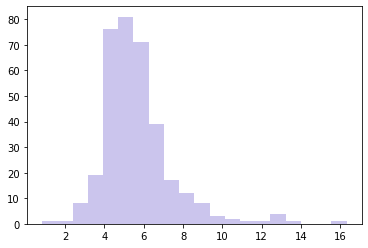

In [67]:
plt.hist(DF3.Distance,bins=20,color='slateblue',alpha=0.35)

In [65]:
DF3['Month'] = DF3.index.month
Aggregate = DF3.groupby(by='Month').mean()

Text(0, 0.5, 'Distance [Miles]')

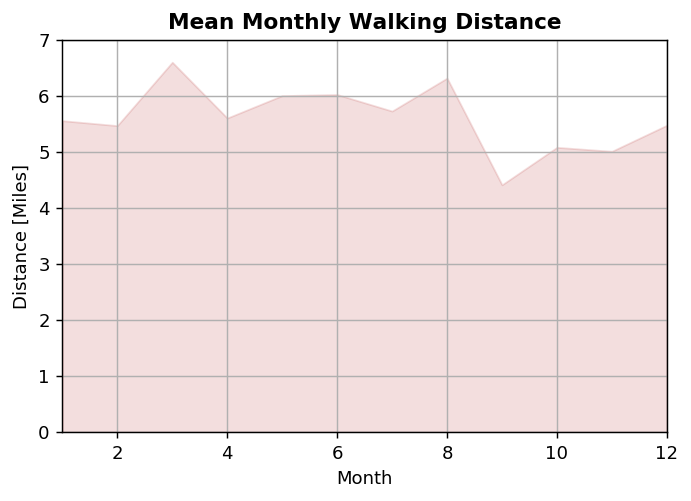

In [66]:
fig4=plt.figure(dpi=130)
ax4=plt.axes()
plt.fill_between(Aggregate.index,Aggregate.Distance,color='firebrick',alpha=0.15)
plt.grid()
plt.title('Mean Monthly Walking Distance',weight='bold')
ax4.set_xlim(left=1,right=12)
ax4.set_ylim(bottom=0,top=7)
ax4.set_xlabel('Month')
ax4.set_ylabel('Distance [Miles]')